The main goal of [Delta E (Δ*E*)](https://en.wikipedia.org/wiki/Color_difference#Delta_E) was seemingly to test whether two solid color patches would be perceived as equivalent colors. For instance, if a tractor body is composed of "green" parts from two separate factories, will those parts appear to be the same green? Smaller values of Delta E suggest a higher probability that a human would say that the colors are the same.

However, Delta E is not necessarily a good measure of contrast. Very large values (much greater than 6) might not be in the order you might expect. Some potentially surprising aspects of CIELAB 1976 Delta E are demonstrated below.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def show_rgb(*args):
    "Plot 1 or more RGB tuples where each value is in range [0 255]."
    im = np.array([args], dtype=np.uint8)
    plt.title(str(args))
    plt.imshow(im, interpolation='none')
    plt.show()

In [2]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie1976

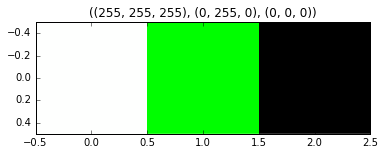

In [3]:
def lab_from_rgb(rgb):
    "Convert RGB tuple to colormath LabColor object."
    return convert_color(sRGBColor(*rgb, is_upscaled=True), LabColor)

def delta_e_cie1976_rgb(rgb1, rgb2):
    "Return delta E for 2 RGB tuples."
    return delta_e_cie1976(lab_from_rgb(rgb1), lab_from_rgb(rgb2))

white = (0xFF, 0xFF, 0xFF)
green = (0, 0xFF, 0)
black = (0, 0, 0)

show_rgb(white, green, black)

Delta E for identical colors should be 0.

In [4]:
delta_e_cie1976_rgb(white, white), delta_e_cie1976_rgb(green, green), delta_e_cie1976_rgb(black, black)

(0.0, 0.0, 0.0)

In [5]:
delta_e_cie1976_rgb(white, green)

120.40810187011418

In [6]:
delta_e_cie1976_rgb(white, black)

99.99998490087933

White and green are "more distant" than white and black.

There's a lot space in the greens, which can be demonstrated by finding other large Delta E values. The following generates 216 [web-safe colors](https://en.wikipedia.org/wiki/Web_colors#Web-safe_colors) as a sample, and calculates the Delta E for each distinct pair of colors from that sample.

In [7]:
from itertools import product, combinations

# Ye olde "web-safe" colors gives us a sample of 6**3 colors.
websafe_rgb = np.array(list(product(range(0, 256, 51), repeat=3)))

# Pairs of indices into websafe_rgb that we'll use for calculating many delta E values.
websafe_pairs = np.array(list(combinations(range(len(websafe_rgb)), 2)))

# Delta E values for all unique pairs of websafe colors.
websafe_delta_e = [delta_e_cie1976_rgb(websafe_rgb[i], websafe_rgb[j]) for i,j in websafe_pairs]

Of these web-safe colors, pure blue and pure green have the maximum Delta E:

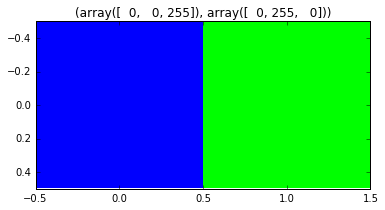

Delta E 258.688954675


In [8]:
max_pair_idx = np.argmax(websafe_delta_e)
show_rgb(*websafe_rgb[websafe_pairs[max_pair_idx]])
print "Delta E", websafe_delta_e[max_pair_idx]

Two shades of cyan have the minimum Delta E:

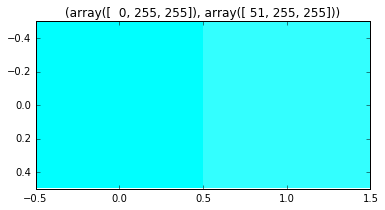

Delta E 2.18167143021


In [9]:
min_pair_idx = np.argmin(websafe_delta_e)
show_rgb(*websafe_rgb[websafe_pairs[min_pair_idx]])
print "Delta E", websafe_delta_e[min_pair_idx]

A comparison of extremely similar shades of yellow:

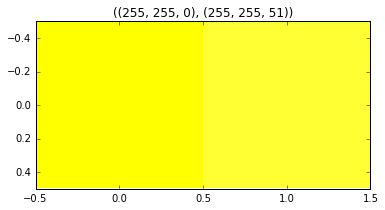

Delta E 6.98008359382


In [10]:
yellow = (0xFF, 0xFF, 0)
lt_yellow = (0xFF, 0xFF, 0x33)
show_rgb(yellow, lt_yellow)
print "Delta E", delta_e_cie1976_rgb(yellow, lt_yellow)